In [1132]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.api as sm

import time

In [1133]:
from numpy import *

In [1134]:
pd.set_option('max_columns', 71)

In [1135]:
cr2 = pd.read_csv('Customer Retention2.csv',encoding ="ISO-8859-1")
cr2.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

# Data Initial Preprocessing

In [1136]:
cr2['22 Ease of navigation in website'].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

In [1137]:
cr2.shape

(269, 71)

Dropping Pincode column from dataframe as it is just an ID and not contributing towards any significant observation

In [1138]:
cr_pinc=cr2[['4 What is the Pin Code of where you shop online from?']]

In [1139]:
cr2.drop(columns=['4 What is the Pin Code of where you shop online from?'],inplace=True)

Renaming long column names to short ones

In [1140]:
cr2=cr2.rename(columns={cr2.columns[0]:"Gender",cr2.columns[1]:"Age",cr2.columns[2]:"City",cr2.columns[3]:"Shopping duration",cr2.columns[4]:"Onl pur counts last 1yr",cr2.columns[5]:"Intrnet accs mode",cr2.columns[6]:"Device",cr2.columns[7]:"Screen size",cr2.columns[8]:"Operating system",cr2.columns[9]:"Browser",cr2.columns[10]:"Channl to visit 1st time",cr2.columns[11]:"After 1st visit reach",cr2.columns[12]:"Time b4 purchase",cr2.columns[13]:"Payment option",cr2.columns[14]:"Abandon frequency",cr2.columns[15]:"Reason abandon",cr2.columns[16]:"Content easy read/understand",cr2.columns[17]:"Product comparison info",cr2.columns[18]:"Compl info vs purch decision",cr2.columns[19]:"Info clarity",cr2.columns[20]:"Ease of navigation",cr2.columns[21]:"Loading/processing speed",cr2.columns[22]:"User friendly Interface",cr2.columns[23]:"Payment methods",cr2.columns[24]:"Trust reg timely transcton",cr2.columns[25]:"Empathy",cr2.columns[26]:"Customer privacy guarantee",cr2.columns[27]:"Responsiveness",cr2.columns[28]:"Monetary benefit/discounts",cr2.columns[29]:"Enjoyment",cr2.columns[30]:"Convenience/flexiblity",cr2.columns[31]:" Return/replacement policy",cr2.columns[32]:"Loyalty programs",cr2.columns[33]:"Quality Info vs satsfacton",cr2.columns[34]:"Good qual website vs satsfacton",cr2.columns[35]:"Benefit vs satsfacton",cr2.columns[36]:"Trust vs satsfacton",cr2.columns[37]:"Wide variety/category",cr2.columns[38]:"Complete/relevent info",cr2.columns[39]:"Monetary savings",cr2.columns[40]:"Convenience",cr2.columns[41]:"Adventure",cr2.columns[42]:"Social status",cr2.columns[43]:"Gratification",cr2.columns[44]:"Fullfill roles",cr2.columns[45]:"Value for money",cr2.columns[46]:"Online retailers shopd from",cr2.columns[47]:"Easy to use",cr2.columns[48]:"Web-page layout",cr2.columns[49]:"Wild variety",cr2.columns[50]:"Compl,rel desc info-products",cr2.columns[51]:"Loading speed",cr2.columns[52]:"Reliability",cr2.columns[53]:"Quickness to compl purch",cr2.columns[54]:"Avail of several payment options",cr2.columns[55]:"Speedy order del",cr2.columns[56]:"Customer privacy",cr2.columns[57]:"Security of cust fin info",cr2.columns[59]:"Online assistance",cr2.columns[60]:"Longer time-logged in",cr2.columns[61]:"Longer time in disp graphics/photos",cr2.columns[62]:"Late declaration-price",cr2.columns[63]:"Longer-loading time",cr2.columns[64]:"Limited mode of payment",cr2.columns[65]:"Longer delivery period",cr2.columns[66]:"Change-webs/App design",cr2.columns[67]:"Freq disruption-moving one page to another",cr2.columns[68]:"Efficient website as b4",cr2.columns[69]:"Online retailer recommend"})

In [1141]:
cr2.head()

Gender          Age           City Shopping duration  \
0    Male  31-40 years          Delhi     Above 4 years   
1  Female  21-30 years          Delhi     Above 4 years   
2  Female  21-30 years  Greater Noida         3-4 years   
3    Male  21-30 years        Karnal          3-4 years   
4  Female  21-30 years     Bangalore          2-3 years   

  Onl pur counts last 1yr Intrnet accs mode      Device Screen size  \
0             31-40 times           Dial-up     Desktop      Others   
1      41 times and above             Wi-Fi  Smartphone  4.7 inches   
2      41 times and above   Mobile Internet  Smartphone  5.5 inches   
3      Less than 10 times   Mobile Internet  Smartphone  5.5 inches   
4             11-20 times             Wi-Fi  Smartphone  4.7 inches   

        Operating system        Browser Channl to visit 1st time  \
0  Window/windows Mobile  Google chrome            Search Engine   
1                IOS/Mac  Google chrome            Search Engine   
2                Android  Google chrome            Search Engine   
3                IOS/Mac         Safari            Search Engine   
4                IOS/Mac         Safari        Content Marketing   

  After 1st visit reach   Time b4 purchase  \
0         Search Engine          6-10 mins   
1       Via application  more than 15 mins   
2       Via application         11-15 mins   
3         Search Engine          6-10 mins   
4       Via application  more than 15 mins   

                       Payment option Abandon frequency  \
0  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1                  Credit/Debit cards   Very frequently   
2  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3                  Credit/Debit cards             Never   
4                  Credit/Debit cards        Frequently   

              Reason abandon Content easy read/understand  \
0              Lack of trust                    Agree (4)   
1  Promo code not applicable           Strongly agree (5)   
2  Promo code not applicable           Strongly agree (5)   
3   Better alternative offer                    Agree (4)   
4   Better alternative offer           Strongly agree (5)   

  Product comparison info Compl info vs purch decision        Info clarity  \
0         Indifferent (3)              Indifferent (3)           Agree (4)   
1      Strongly agree (5)           Strongly agree (5)  Strongly agree (5)   
2               Agree (4)                    Agree (4)           Agree (4)   
3               Agree (4)              Indifferent (3)           Agree (4)   
4         Indifferent (3)              Indifferent (3)           Agree (4)   

   Ease of navigation Loading/processing speed User friendly Interface  \
0           Agree (4)    Strongly disagree (1)           Dis-agree (2)   
1  Strongly agree (5)       Strongly agree (5)      Strongly agree (5)   
2           Agree (4)                Agree (4)      Strongly agree (5)   
3  Strongly agree (5)                Agree (4)      Strongly agree (5)   
4           Agree (4)       Strongly agree (5)      Strongly agree (5)   

      Payment methods Trust reg timely transcton             Empathy  \
0       Dis-agree (2)               Disagree (2)  Strongly agree (5)   
1  Strongly agree (5)         Strongly agree (5)  Strongly agree (5)   
2  Strongly agree (5)         Strongly agree (5)  Strongly agree (5)   
3  Strongly agree (5)                  Agree (4)  Strongly agree (5)   
4  Strongly agree (5)                  Agree (4)  Strongly agree (5)   

  Customer privacy guarantee      Responsiveness Monetary benefit/discounts  \
0                  Agree (4)           Agree (4)            indifferent (3)   
1         Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   
2         Strongly agree (5)  Strongly agree (5)         Strongly agree (5)   
3         Strongly agree (5)           Agree (4)                  Agree (4)   
4                  Agree (4)  Strongly agree (5)         Strongly agree

In [1142]:
for column in cr2.columns:
    if cr2[column].dtypes==object:
        print(str(column)+':'+str(cr2[column].unique()))
        print(cr2[column].value_counts())
        print('************************************************************************************************************')
        print('\n')

Gender:['Male' 'Female']
Female    181
Male       88
Name: Gender, dtype: int64
************************************************************************************************************


Age:['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
************************************************************************************************************


City:['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64
************************************************************************************

Mapping ordinal data separately with codes, so that the order of categories to be sustained, which is not seen in label encoder 

In [1143]:
list=['Content easy read/understand','Product comparison info','Compl info vs purch decision','Info clarity','Ease of navigation','Loading/processing speed','User friendly Interface','Payment methods','Trust reg timely transcton','Empathy','Customer privacy guarantee','Responsiveness','Monetary benefit/discounts','Enjoyment','Convenience/flexiblity','Loyalty programs','Quality Info vs satsfacton','Good qual website vs satsfacton','Benefit vs satsfacton','Trust vs satsfacton','Wide variety/category','Complete/relevent info','Monetary savings','Convenience','Adventure','Social status','Gratification','Fullfill roles','Value for money']
for i in list:
    cr2[i]=cr2[i].map({'Strongly disagree (1)':0,'Dis-agree (2)':1,'indifferent (3)':2,'Agree (4)':3,'Strongly agree (5)':4})

In [1144]:
cr2.head()

Gender          Age           City Shopping duration  \
0    Male  31-40 years          Delhi     Above 4 years   
1  Female  21-30 years          Delhi     Above 4 years   
2  Female  21-30 years  Greater Noida         3-4 years   
3    Male  21-30 years        Karnal          3-4 years   
4  Female  21-30 years     Bangalore          2-3 years   

  Onl pur counts last 1yr Intrnet accs mode      Device Screen size  \
0             31-40 times           Dial-up     Desktop      Others   
1      41 times and above             Wi-Fi  Smartphone  4.7 inches   
2      41 times and above   Mobile Internet  Smartphone  5.5 inches   
3      Less than 10 times   Mobile Internet  Smartphone  5.5 inches   
4             11-20 times             Wi-Fi  Smartphone  4.7 inches   

        Operating system        Browser Channl to visit 1st time  \
0  Window/windows Mobile  Google chrome            Search Engine   
1                IOS/Mac  Google chrome            Search Engine   
2                Android  Google chrome            Search Engine   
3                IOS/Mac         Safari            Search Engine   
4                IOS/Mac         Safari        Content Marketing   

  After 1st visit reach   Time b4 purchase  \
0         Search Engine          6-10 mins   
1       Via application  more than 15 mins   
2       Via application         11-15 mins   
3         Search Engine          6-10 mins   
4       Via application  more than 15 mins   

                       Payment option Abandon frequency  \
0  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1                  Credit/Debit cards   Very frequently   
2  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3                  Credit/Debit cards             Never   
4                  Credit/Debit cards        Frequently   

              Reason abandon  Content easy read/understand  \
0              Lack of trust                           3.0   
1  Promo code not applicable                           4.0   
2  Promo code not applicable                           4.0   
3   Better alternative offer                           3.0   
4   Better alternative offer                           4.0   

   Product comparison info  Compl info vs purch decision  Info clarity  \
0                      NaN                           NaN             3   
1                      4.0                           4.0             4   
2                      3.0                           3.0             3   
3                      3.0                           NaN             3   
4                      NaN                           NaN             3   

   Ease of navigation  Loading/processing speed  User friendly Interface  \
0                   3                       0.0                      1.0   
1                   4                       4.0                      4.0   
2                   3                       3.0                      4.0   
3                   4                       3.0                      4.0   
4                   3                       4.0                      4.0   

   Payment methods  Trust reg timely transcton  Empathy  \
0                1                         NaN        4   
1                4                         4.0        4   
2                4                         4.0        4   
3                4                         3.0        4   
4                4                         3.0        4   

   Customer privacy guarantee  Responsiveness  Monetary benefit/discounts  \
0                           3               3                           2   
1                           4               4                           4   
2                           4               4                           4   
3                           4               3                           3   
4                           3               4                           4   

   Enjoyment  Convenience/flexiblity  Return/replacement policy  \
0          0        

Mapping ordinal categories

In [1145]:
cr2['Abandon frequency']=cr2['Abandon frequency'].map({'Never':0,'Sometimes':1,'Frequently':2,'Very frequently':3})

In [1146]:
cr2['Age'].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

In [1147]:
cr2['Age']=cr2['Age'].map({'Less than 20 years':0,'21-30 years ':1,'31-40 years':2,'41-50 yaers':3,'51 years and above':4})

In [1148]:
cr2['Shopping duration'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Shopping duration, dtype: int64

In [1149]:
cr2['Shopping duration']=cr2['Shopping duration'].map({'Less than 1 year':0,'1-2 years':1,'2-3 years':2,'3-4 years':3,'Above 4 years':4})

In [1150]:
cr2['Onl pur counts last 1yr'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Onl pur counts last 1yr, dtype: int64

In [1151]:
cr2['Onl pur counts last 1yr']=cr2['Onl pur counts last 1yr'].map({'Less than 10 times':0,'11-20 times':1,'21-30 times':2,'31-40 times':3,'41 times and above':4,'42 times and above':5})

In [1152]:
cr2['Screen size'].value_counts()

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: Screen size, dtype: int64

In [1153]:
cr2['Screen size']=cr2['Screen size'].map({'4.7 inches':0,'5 inches':1,'5.5 inches':2,'Others':3})

In [1154]:
cr2['Time b4 purchase'].value_counts()

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Time b4 purchase, dtype: int64

In [1155]:
cr2['Time b4 purchase']=cr2['Time b4 purchase'].map({'Less than 1 min':0,'1-5 mins':1,'6-10 mins':2,'11-15 mins':3,'more than 15 mins':4})

In [1156]:
cr2.isnull().values.any()

True

Checking null values

In [1157]:
cr2.isnull().sum()

Gender                                         0
Age                                           79
City                                           0
Shopping duration                              0
Onl pur counts last 1yr                        0
Intrnet accs mode                              0
Device                                         0
Screen size                                    0
Operating system                               0
Browser                                        0
Channl to visit 1st time                       0
After 1st visit reach                          0
Time b4 purchase                               0
Payment option                                 0
Abandon frequency                              0
Reason abandon                                 0
Content easy read/understand                   7
Product comparison info                       43
Compl info vs purch decision                  52
Info clarity                                   0
Ease of navigation  

Imputing NAN values

In [1158]:
imputer=KNNImputer(missing_values=np.NAN,n_neighbors=2)
lst=['Age','Content easy read/understand','Product comparison info','Compl info vs purch decision','Loading/processing speed','User friendly Interface','Trust reg timely transcton','Complete/relevent info','Monetary savings','Gratification']
for j in lst:
    cr2[j]=imputer.fit_transform(cr2[j].values.reshape(-1,1))
    cr2[j]=pd.DataFrame(cr2[j])

In [1159]:
cr2.isnull().values.any()

False

Dropping ordinal variables from dataframe before Label encoding.

In [1160]:
cr2_tolenc=cr2.drop(columns=['Age','Shopping duration','Onl pur counts last 1yr','Screen size','Time b4 purchase','Content easy read/understand','Product comparison info','Compl info vs purch decision','Info clarity','Ease of navigation','Loading/processing speed','User friendly Interface','Payment methods','Trust reg timely transcton','Empathy','Customer privacy guarantee','Responsiveness','Monetary benefit/discounts','Enjoyment','Convenience/flexiblity','Loyalty programs','Quality Info vs satsfacton','Good qual website vs satsfacton','Benefit vs satsfacton','Trust vs satsfacton','Wide variety/category','Complete/relevent info','Monetary savings','Convenience','Adventure','Social status','Gratification','Fullfill roles','Value for money'])

In [1161]:
cr2enc=cr2[['Age','Shopping duration','Onl pur counts last 1yr','Screen size','Time b4 purchase','Content easy read/understand','Product comparison info','Compl info vs purch decision','Info clarity','Ease of navigation','Loading/processing speed','User friendly Interface','Payment methods','Trust reg timely transcton','Empathy','Customer privacy guarantee','Responsiveness','Monetary benefit/discounts','Enjoyment','Convenience/flexiblity','Loyalty programs','Quality Info vs satsfacton','Good qual website vs satsfacton','Benefit vs satsfacton','Trust vs satsfacton','Wide variety/category','Complete/relevent info','Monetary savings','Convenience','Adventure','Social status','Gratification','Fullfill roles','Value for money']]

Label encoding Nominal categorical variables

In [1162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in cr2_tolenc.columns:
    cr2_tolenc[column]=le.fit_transform(cr2_tolenc[column])

In [1163]:
cr2_tolenc.head()

Gender  City  Intrnet accs mode  Device  Operating system  Browser  \
0       1     2                  0       0                 2        0   
1       0     2                  3       2                 1        0   
2       0     4                  1       2                 0        0   
3       1     6                  1       2                 1        3   
4       0     0                  3       2                 1        3   

   Channl to visit 1st time  After 1st visit reach  Payment option  \
0                         2                      2               2   
1                         2                      4               1   
2                         2                      4               2   
3                         2                      2               1   
4                         0                      4               1   

   Abandon frequency  Reason abandon   Return/replacement policy  \
0                  1               2                           1   
1                  3               4                           2   
2                  1               4                           2   
3                  0               0                           0   
4                  2               0                           2   

   Online retailers shopd from  Easy to use  Web-page layout  Wild variety  \
0                            7            9                7             5   
1                            2            3                5             6   
2                            8            7                6             4   
3                            4            4                3             1   
4                            4            4                9             7   

   Compl,rel desc info-products  Loading speed  Reliability  \
0                            10              9            9   
1                             2              2            8   
2                             7              7            6   
3                             1              6            3   
4                             5              0            6   

   Quickness to compl purch  Avail of several payment options  \
0                         8                                 9   
1                         2                                 2   
2                         5                                10   
3                         3                                 2   
4                         4                                 4   

   Speedy order del  Customer privacy  Security of cust fin info  \
0                 0                 0                          0   
1                 1                 9                          9   
2                 0                 0                          6   
3                 3                 2                          5   
4                 0                 7                         10   

   Perceived Trustworthiness  Online assistance  Longer time-logged in  \
0                          7                  9                      0   
1                          8                  2                      1   
2                          6                  8                      7   
3                          5                  3                      9   
4                          6                  5                      5   

   Longer time in disp graphics/photos  Late declaration-price  \
0                                    0                       3   
1                                    6                       7   
2                                    6                       4   
3                                    7                       4   
4                                    8                       5   

   Longer-loading time  Limited mode of payment  Longer delivery period  \
0                    5                        0                       3   
1                   10                        7                       5   
2                  

In [1164]:
cr2enc.head()

Age  Shopping duration  Onl pur counts last 1yr  Screen size  \
0  2.000000                  4                        3            3   
1  2.357895                  4                        4            0   
2  2.357895                  3                        4            2   
3  2.357895                  3                        0            2   
4  2.357895                  2                        1            0   

   Time b4 purchase  Content easy read/understand  Product comparison info  \
0                 2                           3.0                 3.353982   
1                 4                           4.0                 4.000000   
2                 3                           4.0                 3.000000   
3                 2                           3.0                 3.000000   
4                 4                           4.0                 3.353982   

   Compl info vs purch decision  Info clarity  Ease of navigation  \
0                      3.082949             3                   3   
1                      4.000000             4                   4   
2                      3.000000             3                   3   
3                      3.082949             3                   4   
4                      3.082949             3                   3   

   Loading/processing speed  User friendly Interface  Payment methods  \
0                       0.0                      1.0                1   
1                       4.0                      4.0                4   
2                       3.0                      4.0                4   
3                       3.0                      4.0                4   
4                       4.0                      4.0                4   

   Trust reg timely transcton  Empathy  Customer privacy guarantee  \
0                    3.621145        4                           3   
1                    4.000000        4                           4   
2                    4.000000        4                           4   
3                    3.000000        4                           4   
4                    3.000000        4                           3   

   Responsiveness  Monetary benefit/discounts  Enjoyment  \
0               3                           2          0   
1               4                           4          4   
2               4                           4          4   
3               3                           3          2   
4               4                           4          4   

   Convenience/flexiblity  Loyalty programs  Quality Info vs satsfacton  \
0                       1                 3                           2   
1                       4                 4                           4   
2                       4                 4                           4   
3                       2                 2                           2   
4                       4                 1                           3   

   Good qual website vs satsfacton  Benefit vs satsfacton  \
0                                4                      3   
1                                4                      4   
2                                4                      4   
3                                3                      2   
4                                4                      4   

   Trust vs satsfacton  Wide variety/category  Complete/relevent info  \
0                    4                      2                     2.0   
1                    4                      4                     4.0   
2                    3                      4                     4.0   
3                    3                      3                     3.0   
4                    4                      3                     3.0   

   Monetary savings  Convenience  Adventure  Social status  Gratification  \
0          3.558824            2          3              3            4.0   
1          4.000000            2          2              2 

In [1165]:
cr2_tolenc.shape

(269, 36)

In [1166]:
cr2enc.shape

(269, 34)

Concatenating Ordinal and Nominal encoded dataframes as a final dataframe

In [1167]:
cr2_label = pd.concat([cr2_tolenc, cr2enc], axis=1)

In [1168]:
cr2_label.head()

Gender  City  Intrnet accs mode  Device  Operating system  Browser  \
0       1     2                  0       0                 2        0   
1       0     2                  3       2                 1        0   
2       0     4                  1       2                 0        0   
3       1     6                  1       2                 1        3   
4       0     0                  3       2                 1        3   

   Channl to visit 1st time  After 1st visit reach  Payment option  \
0                         2                      2               2   
1                         2                      4               1   
2                         2                      4               2   
3                         2                      2               1   
4                         0                      4               1   

   Abandon frequency  Reason abandon   Return/replacement policy  \
0                  1               2                           1   
1                  3               4                           2   
2                  1               4                           2   
3                  0               0                           0   
4                  2               0                           2   

   Online retailers shopd from  Easy to use  Web-page layout  Wild variety  \
0                            7            9                7             5   
1                            2            3                5             6   
2                            8            7                6             4   
3                            4            4                3             1   
4                            4            4                9             7   

   Compl,rel desc info-products  Loading speed  Reliability  \
0                            10              9            9   
1                             2              2            8   
2                             7              7            6   
3                             1              6            3   
4                             5              0            6   

   Quickness to compl purch  Avail of several payment options  \
0                         8                                 9   
1                         2                                 2   
2                         5                                10   
3                         3                                 2   
4                         4                                 4   

   Speedy order del  Customer privacy  Security of cust fin info  \
0                 0                 0                          0   
1                 1                 9                          9   
2                 0                 0                          6   
3                 3                 2                          5   
4                 0                 7                         10   

   Perceived Trustworthiness  Online assistance  Longer time-logged in  \
0                          7                  9                      0   
1                          8                  2                      1   
2                          6                  8                      7   
3                          5                  3                      9   
4                          6                  5                      5   

   Longer time in disp graphics/photos  Late declaration-price  \
0                                    0                       3   
1                                    6                       7   
2                                    6                       4   
3                                    7                       4   
4                                    8                       5   

   Longer-loading time  Limited mode of payment  Longer delivery period  \
0                    5                        0                       3   
1                   10                        7                       5   
2                  

In [1169]:
cr2_label.shape

(269, 70)

Summary Statistics

In [1170]:
cr2_label.describe()

Gender        City  Intrnet accs mode      Device  \
count  269.000000  269.000000         269.000000  269.000000   
mean     0.327138    4.494424           2.078067    1.501859   
std      0.470042    3.187687           0.715919    0.751240   
min      0.000000    0.000000           0.000000    0.000000   
25%      0.000000    2.000000           2.000000    1.000000   
50%      0.000000    4.000000           2.000000    2.000000   
75%      1.000000    7.000000           3.000000    2.000000   
max      1.000000   10.000000           3.000000    3.000000   

       Operating system     Browser  Channl to visit 1st time  \
count        269.000000  269.000000                269.000000   
mean           1.137546    0.524164                  1.780669   
std            0.867985    1.097985                  0.566672   
min            0.000000    0.000000                  0.000000   
25%            0.000000    0.000000                  2.000000   
50%            1.000000    0.000000                  2.000000   
75%            2.000000    0.000000                  2.000000   
max            2.000000    3.000000                  2.000000   

       After 1st visit reach  Payment option  Abandon frequency  \
count             269.000000      269.000000         269.000000   
mean                2.081784        0.884758           1.063197   
std                 1.555204        0.661938           0.727718   
min                 0.000000        0.000000           0.000000   
25%                 0.000000        0.000000           1.000000   
50%                 2.000000        1.000000           1.000000   
75%                 4.000000        1.000000           1.000000   
max                 4.000000        2.000000           3.000000   

       Reason abandon   Return/replacement policy  \
count      269.000000                  269.000000   
mean         1.327138                    1.546468   
std          1.589626                    0.793324   
min          0.000000                    0.000000   
25%          0.000000                    1.000000   
50%          1.000000                    2.000000   
75%          3.000000                    2.000000   
max          4.000000                    2.000000   

       Online retailers shopd from  Easy to use  Web-page layout  \
count                   269.000000   269.000000       269.000000   
mean                      3.791822     3.472119         2.977695   
std                       2.185725     2.415004         2.809808   
min                       0.000000     0.000000         0.000000   
25%                       2.000000     1.000000         1.000000   
50%                       4.000000     3.000000         2.000000   
75%                       5.000000     5.000000         5.000000   
max                       8.000000     9.000000         9.000000   

       Wild variety  Compl,rel desc info-products  Loading speed  Reliability  \
count    269.000000                    269.000000     269.000000   269.000000   
mean       2.185874                      3.003717       3.762082     3.237918   
std        2.253278                      3.025388       2.838155     2.861722   
min        0.000000                      0.000000       0.000000     0.000000   
25%        1.000000                      1.000000       1.000000     1.000000   
50%        1.000000                      1.000000       4.000000     3.000000   
75%        4.000000                      5.000000       6.000000     6.000000   
max        8.000000                     10.000000       9.000000     9.000000   

       Quickness to compl purch  Avail of several payment options  \
count                269.000000                        269.000000   
mean                   2.921933                          3.680297   
std                    2.626899                          3.043531   
min                    0.000000                          0.000000   
25%                    1.000000                          1.000000   
50%      

Observation-

From above statistics, I am not seeing any major outlier problem. Since all the variables are categorical, so we need not to do the scaling of variables. Also, I wanted to reduce the skewness of data, so I did normalization using log transformation and found out that there was no any impact on skewness, hence assuming this skewness the valuable property of data I left skewness as it is.

# Exploratoary Data Analysis

Visualizing skewness with distplot

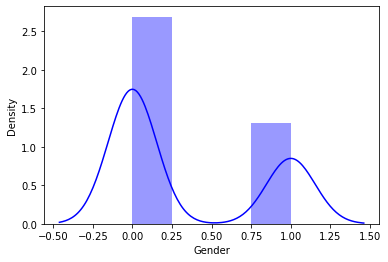

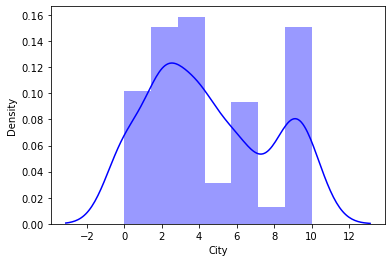

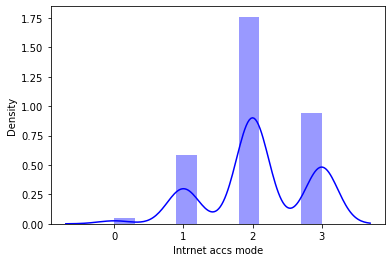

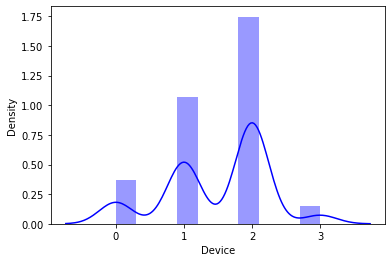

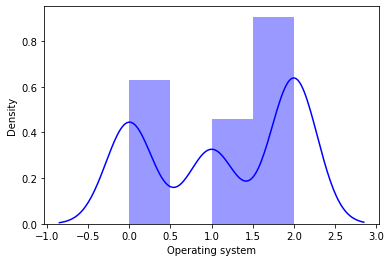

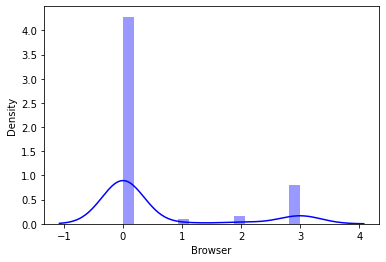

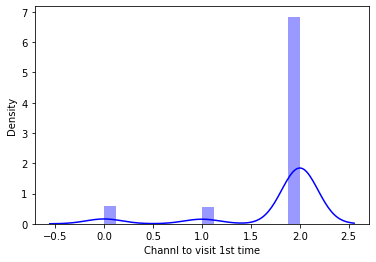

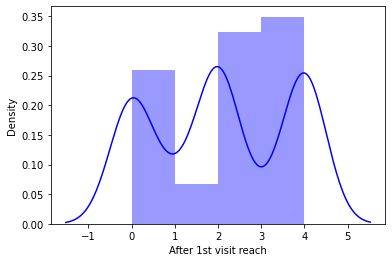

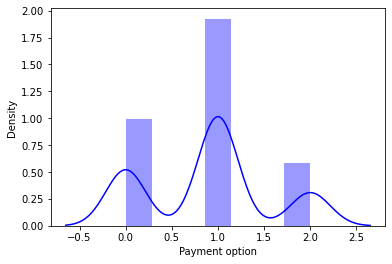

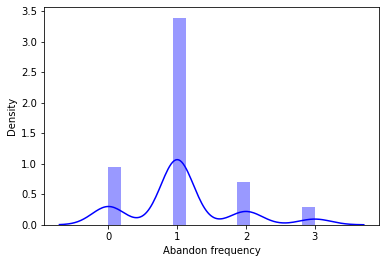

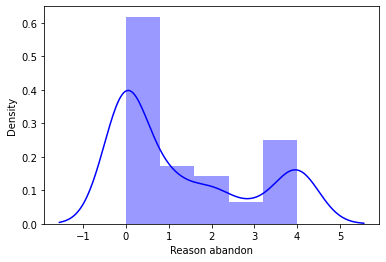

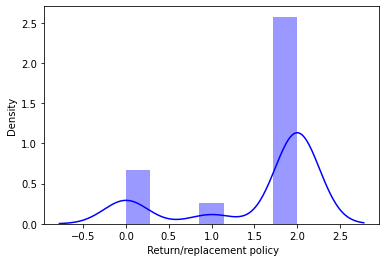

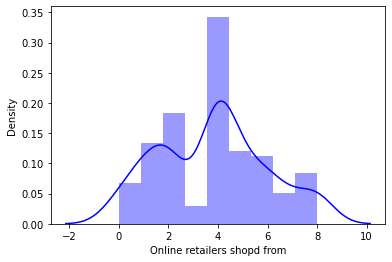

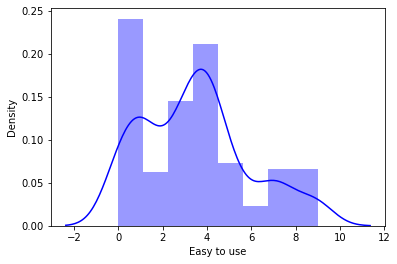

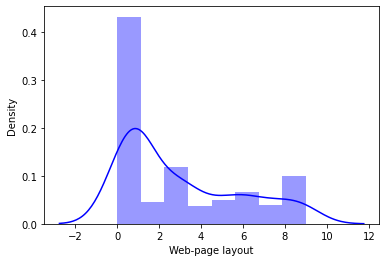

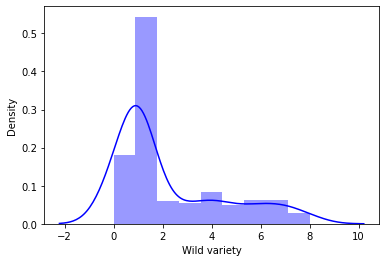

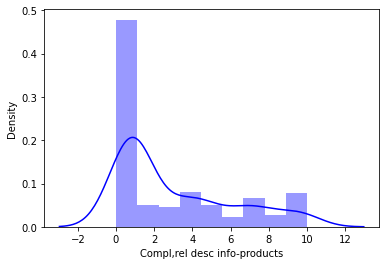

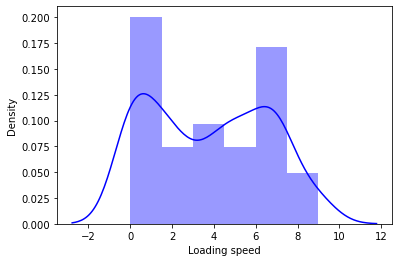

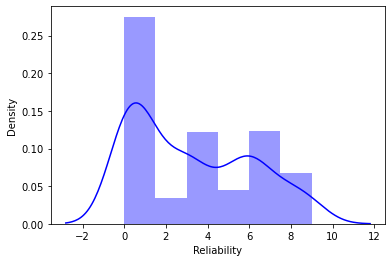

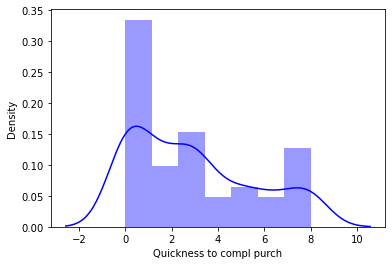

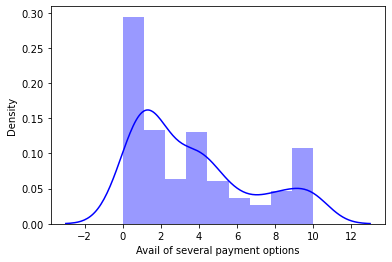

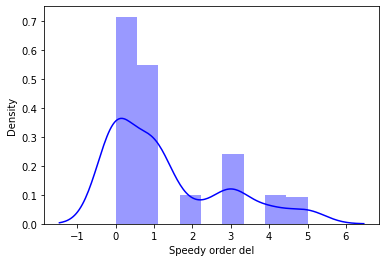

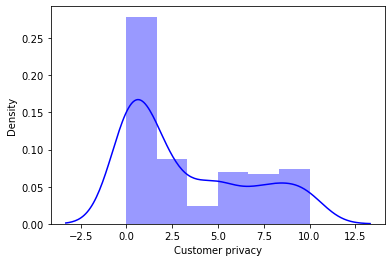

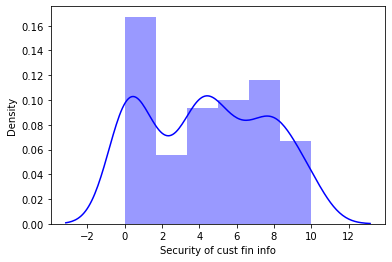

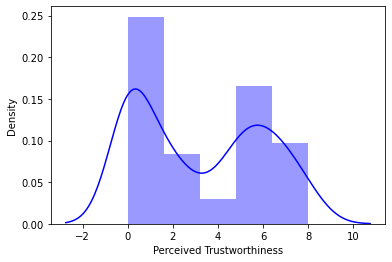

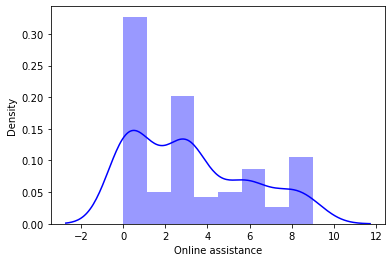

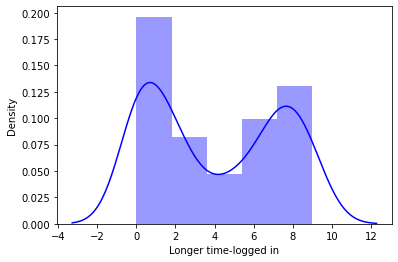

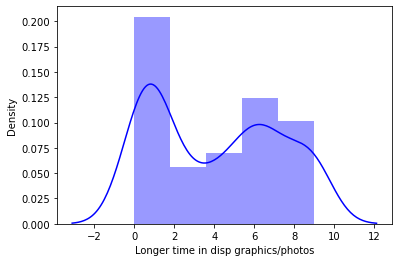

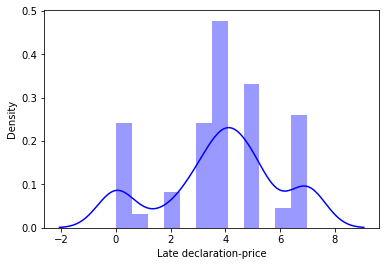

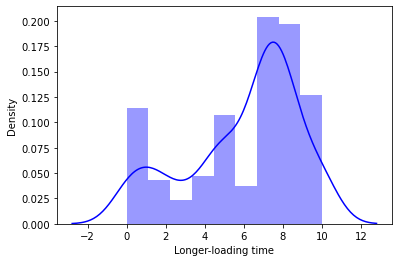

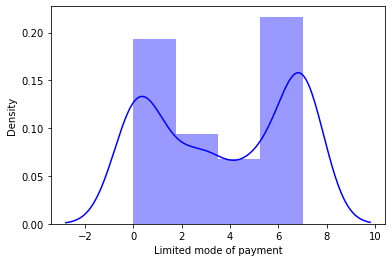

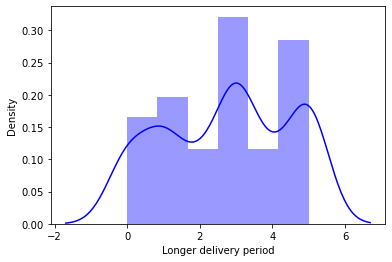

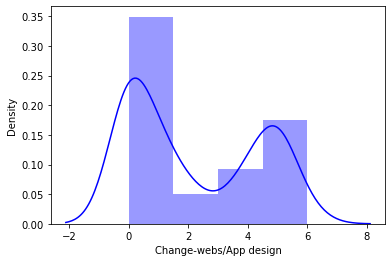

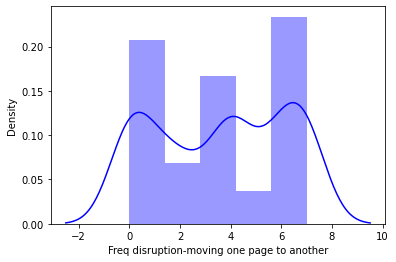

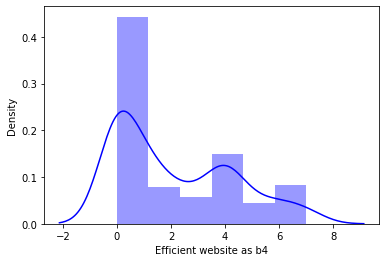

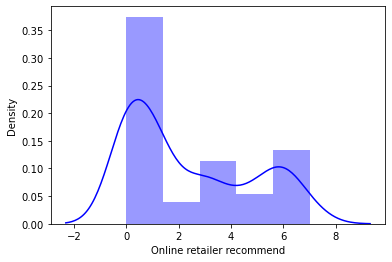

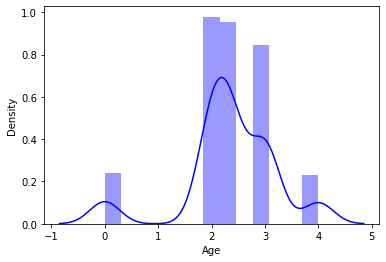

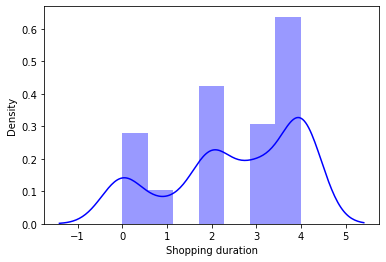

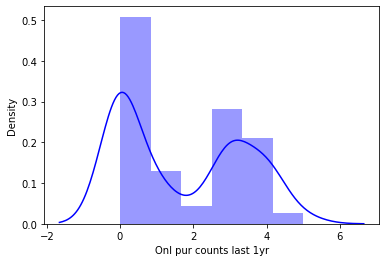

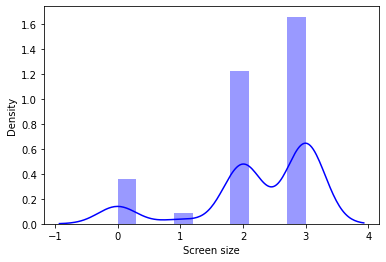

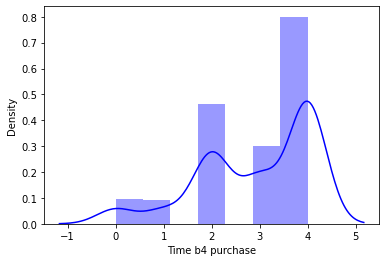

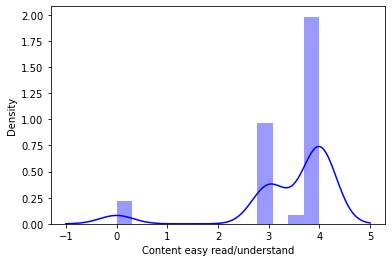

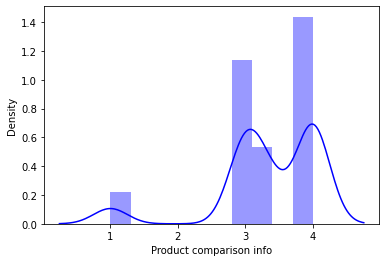

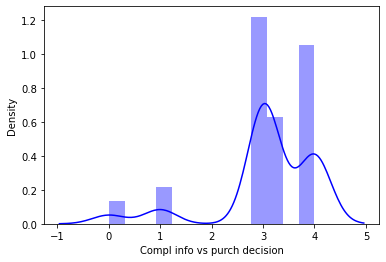

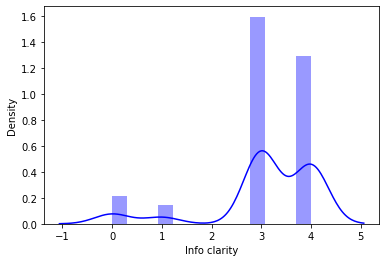

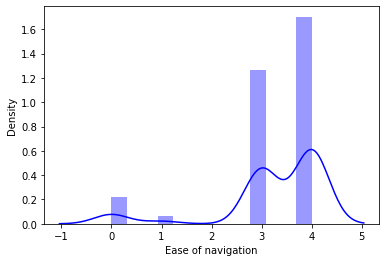

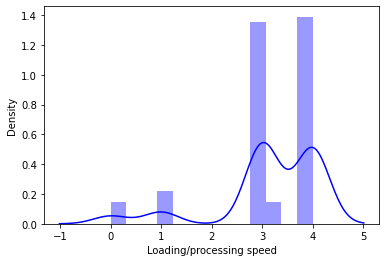

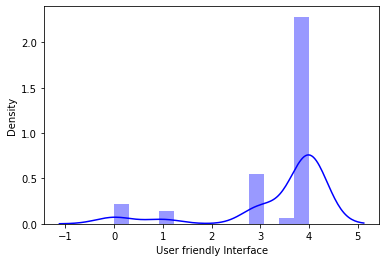

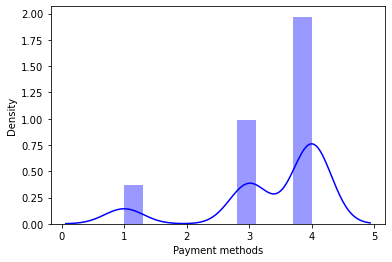

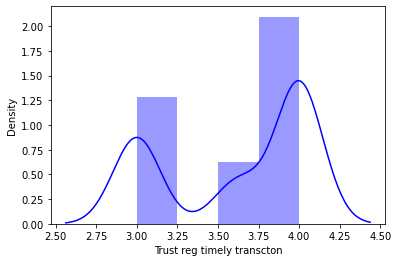

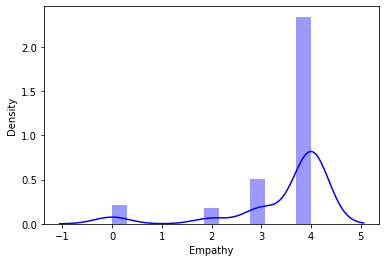

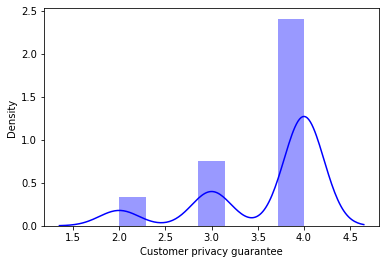

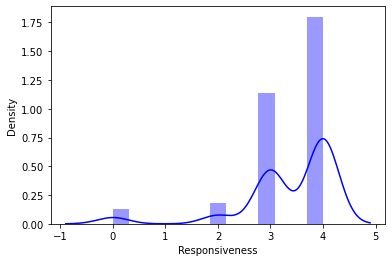

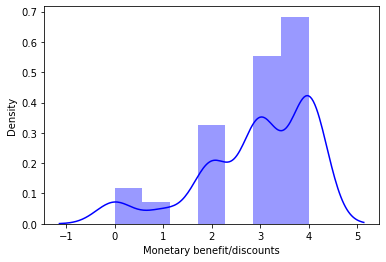

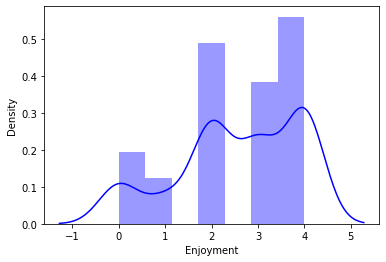

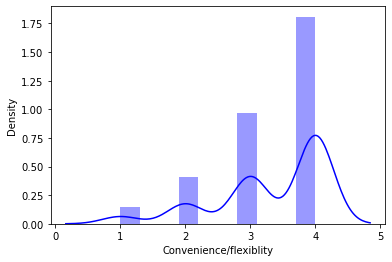

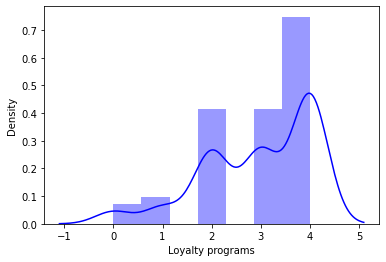

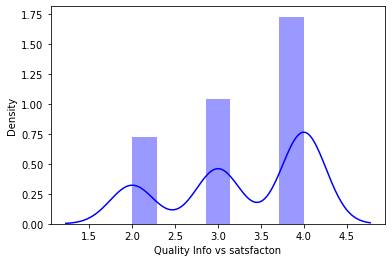

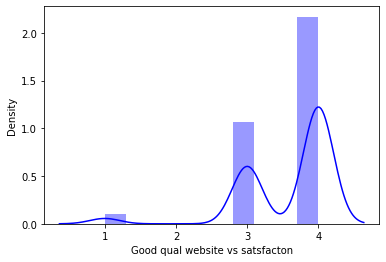

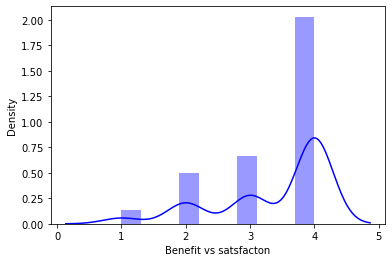

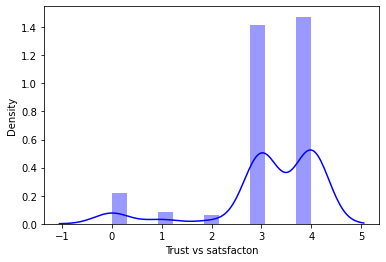

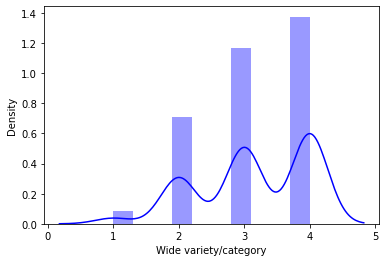

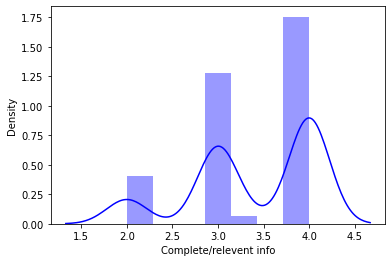

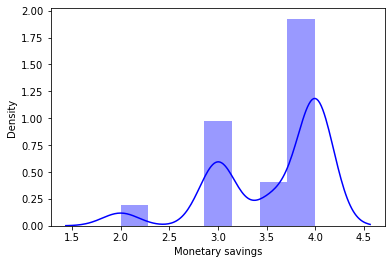

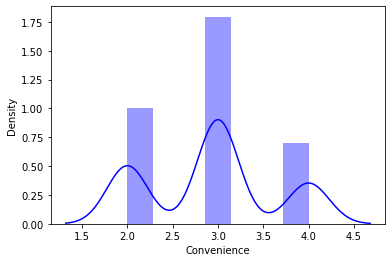

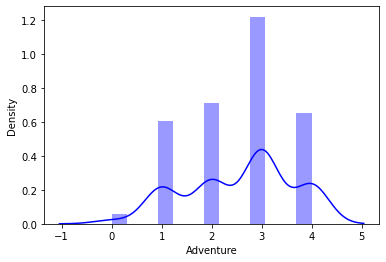

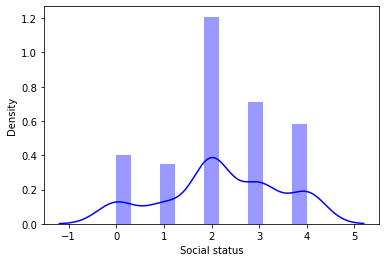

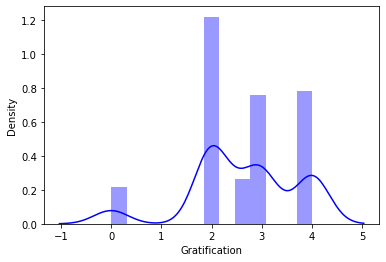

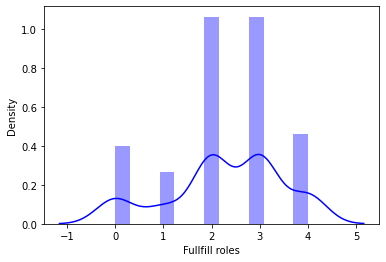

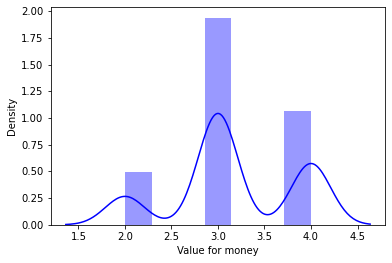

In [1171]:
for col in cr2_label.describe().columns:
    sns.distplot(cr2_label[col],color='b')
    plt.show()

Checking feature variance contribution as a part of Multi -collinearity

In [1172]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = cr2_label.columns
vif_data["VIF"] = [variance_inflation_factor(cr2_label.values, i)
                          for i in range(len(cr2_label.columns))]

In [1173]:
pd.set_option('max_rows', 70)

In [1174]:
print(vif_data)

                                       feature        VIF
0                                       Gender   2.021907
1                                         City   1.632365
2                            Intrnet accs mode   2.205831
3                                       Device  37.041246
4                             Operating system  38.254270
5                                      Browser        inf
6                     Channl to visit 1st time        inf
7                        After 1st visit reach        inf
8                               Payment option        inf
9                            Abandon frequency        inf
10                              Reason abandon        inf
11                   Return/replacement policy        inf
12                 Online retailers shopd from        inf
13                                 Easy to use        inf
14                             Web-page layout        inf
15                                Wild variety        inf
16            

From above we observe that Gender, City, Intrnet accs mode, Age, Shopping duration and Onl pur counts last 1yr have less Multi-collinearity with other features. The rest of the feature have very high or perfect(Infinite) correlation with each other, so some of the features need to be dropped to overcome this problem

Checking for Null hypothesis using chi2 test

In [1175]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(cr2_label['Monetary savings'], cr2_label['Online retailer recommend']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 413.12054480258433, p-value: 1.7822313741235225e-74


In [1176]:
# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(cr2_label['Wide variety/category'], cr2_label['Adventure']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 149.56240154366708, p-value: 6.95567736056371e-26


In [1177]:
cr2_label2=cr2_label.drop(columns=['Onl pur counts last 1yr'])

In [1178]:
chi2_check = []
for i in cr2_label2:
    if chi2_contingency(pd.crosstab(cr2_label['Onl pur counts last 1yr'], cr2_label2[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [cr2_label2.columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                        Column                      Hypothesis
0                                       Gender          Reject Null Hypothesis
1                                         City          Reject Null Hypothesis
2                            Intrnet accs mode          Reject Null Hypothesis
3                                       Device          Reject Null Hypothesis
4                             Operating system          Reject Null Hypothesis
5                                      Browser  Fail to Reject Null Hypothesis
6                     Channl to visit 1st time          Reject Null Hypothesis
7                        After 1st visit reach          Reject Null Hypothesis
8                               Payment option          Reject Null Hypothesis
9                            Abandon frequency          Reject Null Hypothesis
10                              Reason abandon          Reject Null Hypothesis
11                   Return/replacement policy      

In [881]:
cr2_label3=cr2_label.drop(columns=['Shopping duration'])

In [1180]:
chi2_check2 = []
for i in cr2_label3:
    if chi2_contingency(pd.crosstab(cr2_label['Shopping duration'], cr2_label3[i]))[1] < 0.05:
        chi2_check2.append('Reject Null Hypothesis')
    else:
        chi2_check2.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [cr2_label3.columns, chi2_check2] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                        Column                      Hypothesis
0                                       Gender          Reject Null Hypothesis
1                                          Age          Reject Null Hypothesis
2                                         City          Reject Null Hypothesis
3                      Onl pur counts last 1yr          Reject Null Hypothesis
4                            Intrnet accs mode          Reject Null Hypothesis
5                                       Device          Reject Null Hypothesis
6                                  Screen size          Reject Null Hypothesis
7                             Operating system          Reject Null Hypothesis
8                                      Browser          Reject Null Hypothesis
9                     Channl to visit 1st time          Reject Null Hypothesis
10                       After 1st visit reach          Reject Null Hypothesis
11                            Time b4 purchase      

In [1181]:
cr2_label4=cr2_label.drop(columns=['Online retailer recommend'])

In [1182]:
chi2_check3 = []
for i in cr2_label4:
    if chi2_contingency(pd.crosstab(cr2_label['Online retailer recommend'], cr2_label4[i]))[1] < 0.05:
        chi2_check3.append('Reject Null Hypothesis')
    else:
        chi2_check3.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [cr2_label4.columns, chi2_check3] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                        Column              Hypothesis
0                                       Gender  Reject Null Hypothesis
1                                         City  Reject Null Hypothesis
2                            Intrnet accs mode  Reject Null Hypothesis
3                                       Device  Reject Null Hypothesis
4                             Operating system  Reject Null Hypothesis
5                                      Browser  Reject Null Hypothesis
6                     Channl to visit 1st time  Reject Null Hypothesis
7                        After 1st visit reach  Reject Null Hypothesis
8                               Payment option  Reject Null Hypothesis
9                            Abandon frequency  Reject Null Hypothesis
10                              Reason abandon  Reject Null Hypothesis
11                   Return/replacement policy  Reject Null Hypothesis
12                 Online retailers shopd from  Reject Null Hypothesis
13    

From ch2 test for Null hypothesis of two categorical variables also we see that in almost all cases p value is less than 0.05(significance value), so there is very high correlation among most of the features and thus we can reject the null hypothesis 

In [1183]:
cr2_labell=cr2_label.drop(columns=['Value for money','Wide variety/category','Benefit vs satsfacton','Quality Info vs satsfacton','Responsiveness','Empathy','Loading/processing speed','Ease of navigation','Info clarity','Freq disruption-moving one page to another','Longer time in disp graphics/photos','Online assistance','Avail of several payment options','Reliability','Reason abandon','Abandon frequency','Time b4 purchase','Channl to visit 1st time','Browser','Screen size','Operating system','After 1st visit reach','Payment option','Online retailers shopd from','Web-page layout','Loading speed','Quickness to compl purch','Customer privacy','Perceived Trustworthiness','Longer time-logged in','Late declaration-price','Limited mode of payment','Change-webs/App design','Efficient website as b4','Content easy read/understand','Compl info vs purch decision','User friendly Interface','Trust reg timely transcton','Customer privacy guarantee','Loyalty programs','Good qual website vs satsfacton','Trust vs satsfacton','Complete/relevent info'])

Above I have manually selected some features which according to me were showing very high correlation with other features or were not showing much importance in effective data analysis or were having similar kind of features already present in dataset ascertaing similar purpose. 

In [1184]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = cr2_labell.columns
vif_data["VIF"] = [variance_inflation_factor(cr2_labell.values, i)
                          for i in range(len(cr2_labell.columns))]

In [1185]:
print(vif_data)

                         feature          VIF
0                         Gender     2.517777
1                           City     4.746560
2              Intrnet accs mode    19.446720
3                         Device    42.304117
4      Return/replacement policy   354.100576
5                    Easy to use   316.643181
6                   Wild variety    39.386564
7   Compl,rel desc info-products   253.253222
8               Speedy order del    41.589959
9      Security of cust fin info    70.810400
10           Longer-loading time   240.794741
11        Longer delivery period   157.211140
12     Online retailer recommend    74.371486
13                           Age    13.088483
14             Shopping duration     6.360930
15       Onl pur counts last 1yr     2.979791
16       Product comparison info   648.785262
17               Payment methods  1271.218401
18    Monetary benefit/discounts  1850.967853
19                     Enjoyment   309.017149
20        Convenience/flexiblity  

In [886]:
#Gratification,Role,Best Deal,Social Status,Adventure,Product Offerings,Convenience,Product information, Monetary savings

In [887]:
#cr2_label.drop(columns=['Easy to use','Product comparison info','Monetary benefit/discounts','Convenience/flexiblity','Enjoyment','Longer-loading time','Longer delivery period'],inplace=True)

Visualizing feature correlation and multi-correlation with the help of heatmap

<AxesSubplot:>

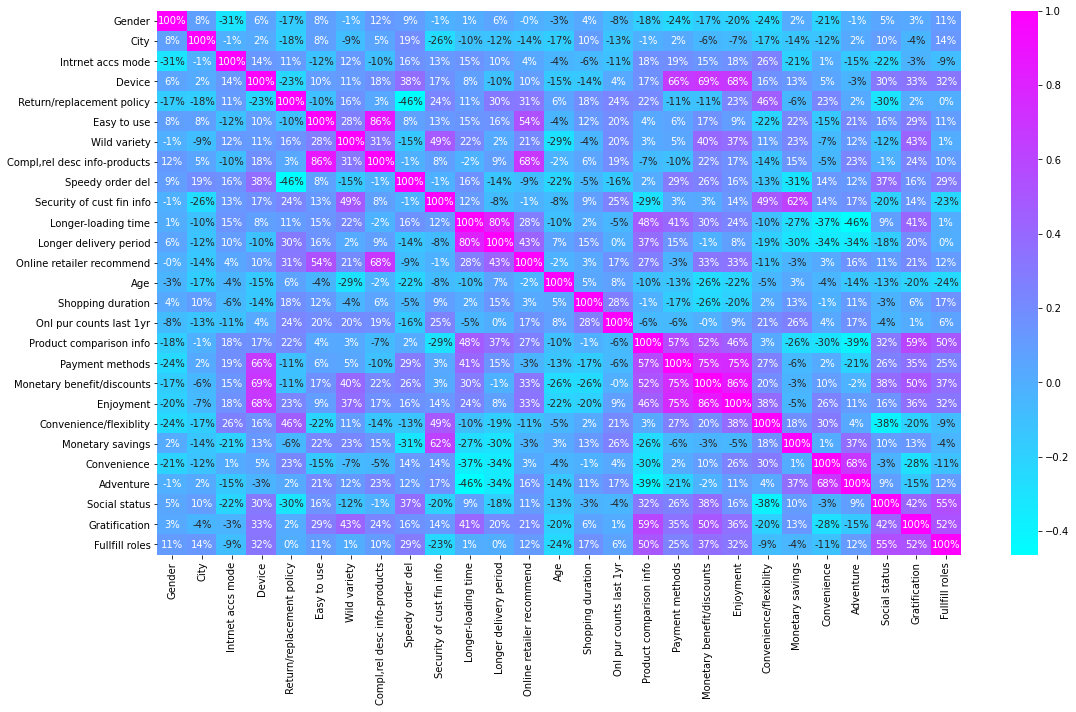

In [1186]:
plt.figure(figsize=(18,10))
cor=cr2_labell.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

In [889]:
#Device,Easy to use,Security of cust fin info,Longer-loading time,Product comparison info,Payment methods,Enjoyment,convenience. 

Dropping columns with high multi-collinearity 

In [1187]:
cr2_labelll=cr2_labell.drop(columns=['Device','Easy to use','Security of cust fin info','Longer-loading time','Product comparison info','Payment methods','Enjoyment','Convenience'])

Above I dropped columns with correlation more than 55% except online retailer recommend with 68% because I want to analyse it further considering it as an important feature.

<AxesSubplot:>

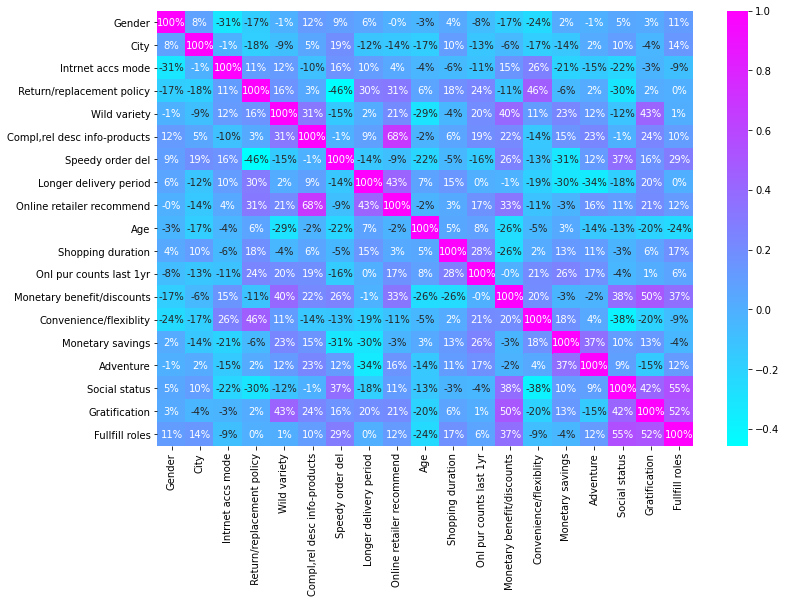

In [1188]:
plt.figure(figsize=(12,8))
cor=cr2_labelll.corr()
sns.heatmap(cor,annot=True,fmt='.0%',cmap='cool')

After above all steps I got 19 final features for further data analysis. Now I want to check if these 19 selected features are showing the enough overall variance percentage into data, so I opted for Scree plot in PCA to visualize the significance of selected features.

In [1189]:
from sklearn.decomposition import PCA

In [1190]:
pca=PCA(n_components=40)
pca.fit_transform(cr2_label.values)
print(pca.explained_variance_ratio_)

[2.45459608e-01 1.73973122e-01 1.27823028e-01 7.35524543e-02
 5.32374840e-02 5.20941039e-02 4.46785236e-02 3.96647959e-02
 3.25770687e-02 2.62655670e-02 2.31604356e-02 1.75021703e-02
 1.63147391e-02 1.38606028e-02 1.21914260e-02 9.98183753e-03
 8.53149237e-03 7.07774775e-03 5.19157563e-03 4.94508848e-03
 3.13044131e-03 2.81444286e-03 1.96560863e-03 1.71798498e-03
 1.26076629e-03 4.57484150e-04 4.03419750e-04 1.29724203e-04
 3.72559426e-05 4.84083722e-32 1.31936508e-32 8.21285618e-33
 5.21645468e-33 5.10046561e-33 1.43954791e-33 1.43954791e-33
 1.43954791e-33 1.43954791e-33 1.43954791e-33 1.43954791e-33]


In [1191]:
def scree_plot(pca):
    num_components=len(pca.explained_variance_ratio_)
    index=np.arange(num_components)
    values=pca.explained_variance_ratio_

    #define the graph
    plt.figure(figsize=(18,6))
    ax=plt.subplot(111)
    cumulative=np.cumsum(values)

    ax.bar(index,values)
    ax.plot(index,cumulative)

    #add annotation to our graph

    for val in range(num_components):
        ax.annotate(r"%s" % ((str(values[val]*100)[:3])),(index[val],values[val]),va='bottom',ha='center',fontsize=16)
    
    # setting tick parameters
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    
    #labeling x and y axis
    ax.set_xlabel('Principal Component Values')
    ax.set_ylabel('Variance Explained Percentage')
    plt.title('Scree plot of variance explained ratio for each principal component')

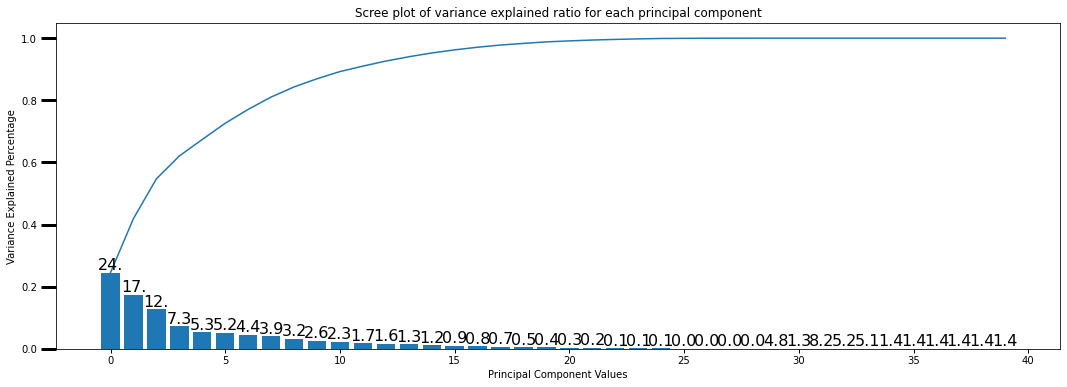

In [1192]:
scree_plot(pca)

From above we observe that the selected 19 features could be sufficient to show overall variance percentage more than 90%

Again, visualizing scree plot with 19 feature components

In [1196]:
pca2=PCA(n_components=19)
pca2.fit_transform(cr2_labelll.values)
print(pca2.explained_variance_ratio_)

[0.28332436 0.21585474 0.10169812 0.08060906 0.07479917 0.06208431
 0.03739096 0.0314912  0.02859139 0.02163473 0.0157927  0.01069953
 0.00954486 0.00734466 0.00681581 0.00485682 0.00440619 0.00243744
 0.00062398]


In [1199]:
def scree_plot(pca2):
    num_components=len(pca2.explained_variance_ratio_)
    index=np.arange(num_components)
    values=pca2.explained_variance_ratio_

    #define the graph
    plt.figure(figsize=(18,6))
    ax=plt.subplot(111)
    cumulative=np.cumsum(values)

    ax.bar(index,values)
    ax.plot(index,cumulative)

    #add annotation to our graph

    for val in range(num_components):
        ax.annotate(r"%s" % ((str(values[val]*100)[:3])),(index[val],values[val]),va='bottom',ha='center',fontsize=16)
    
    # setting tick parameters
    ax.xaxis.set_tick_params(width=1)
    ax.yaxis.set_tick_params(width=3,length=15)
    
    #labeling x and y axis
    ax.set_xlabel('Principal Component Values')
    ax.set_ylabel('Variance Explained Percentage')
    plt.title('Scree plot of variance explained ratio for each principal component')

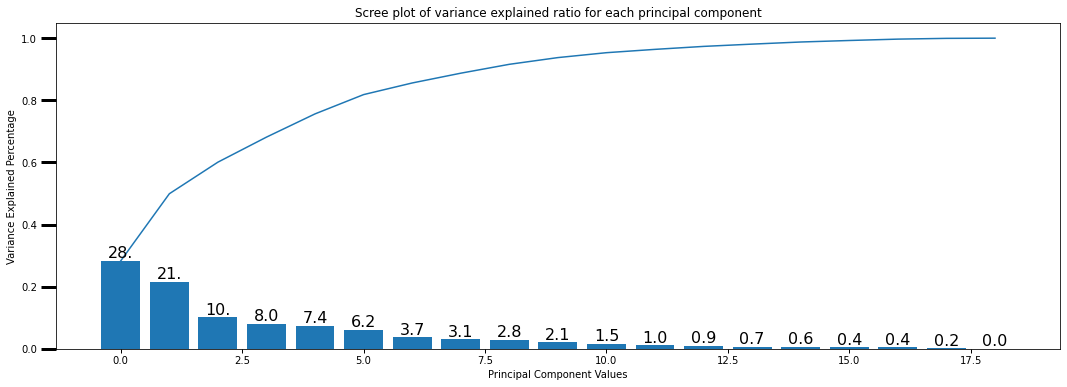

In [1200]:
scree_plot(pca2)

Below, to see the output variable correlation with input features, I have selected 3 variables and d.id analysis separately for them

1. Shopping duration as output

Text(0.5, 1.0, 'correlation with target variable - Shopping duration')

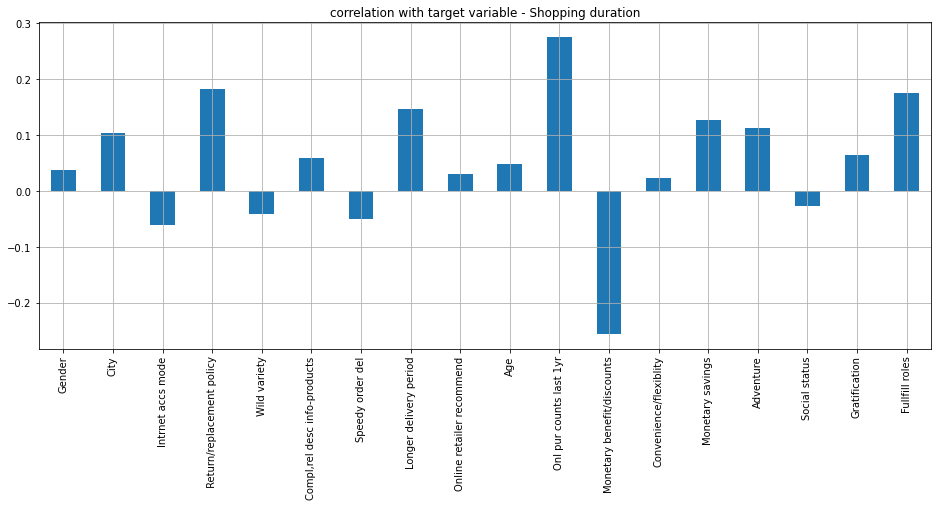

In [1201]:
plt.figure(figsize=(16,6))
cr2_labelll.drop('Shopping duration',axis=1).corrwith(cr2_labelll['Shopping duration']).plot(kind='bar',grid=True)
plt.title("correlation with target variable - Shopping duration")

2. Onl pur counts last 1yr as output

Text(0.5, 1.0, 'correlation with target variable - Onl pur counts last 1yr')

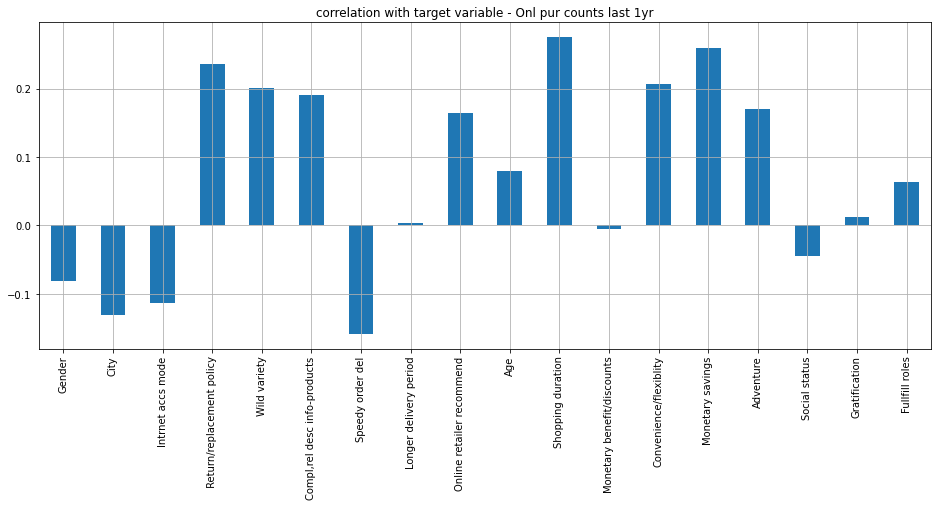

In [1202]:
plt.figure(figsize=(16,6))
cr2_labelll.drop('Onl pur counts last 1yr',axis=1).corrwith(cr2_labelll['Onl pur counts last 1yr']).plot(kind='bar',grid=True)
plt.title("correlation with target variable - Onl pur counts last 1yr")

3. Online retailer recommend as output

Text(0.5, 1.0, 'correlation with target variable - Online retailer recommend')

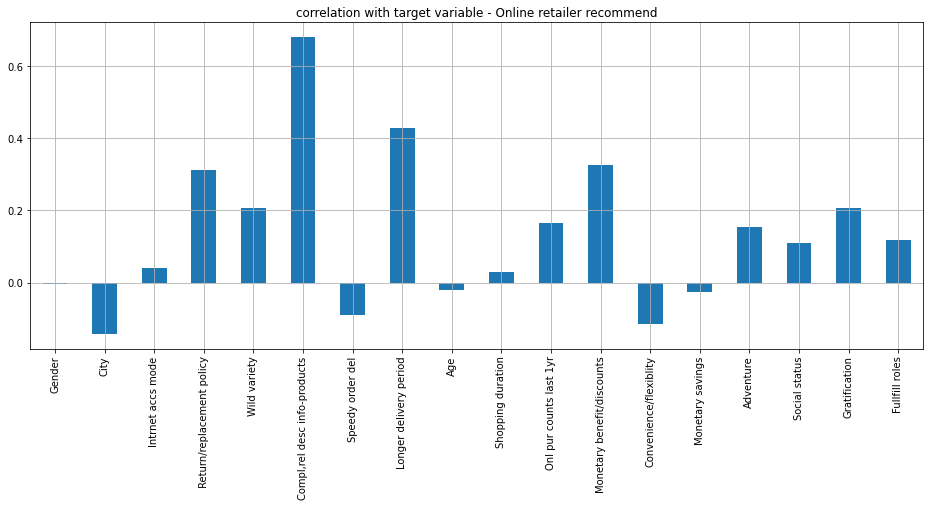

In [1203]:
plt.figure(figsize=(16,6))
cr2_labelll.drop('Online retailer recommend',axis=1).corrwith(cr2_labelll['Online retailer recommend']).plot(kind='bar',grid=True)
plt.title("correlation with target variable - Online retailer recommend")

Univariate Analysis

Histogram plot to analyze mean of output variable

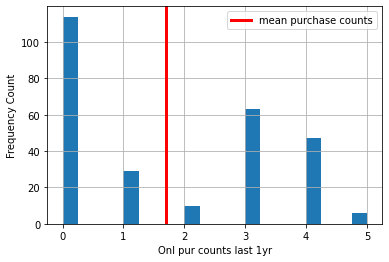

In [1224]:
import numpy as np
purchase_counts=cr2_labelll['Onl pur counts last 1yr'].hist(bins=20)
mean_val=np.mean(cr2_labelll['Onl pur counts last 1yr'])
plt.axvline(mean_val,linewidth=3,color='red',label='mean purchase counts')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Frequency Count')
plt.legend()
plt.show()

Observation: The mean value of Onl pur counts last 1yr is around 17 and such customer count is 0. There is highest no customers i.e around 115 for the customers who did online purchase for approx 0-3 times in last year. The least count of the customers is around 30 where the customers did online purchase 21-30 times.

Bivariate Analysis

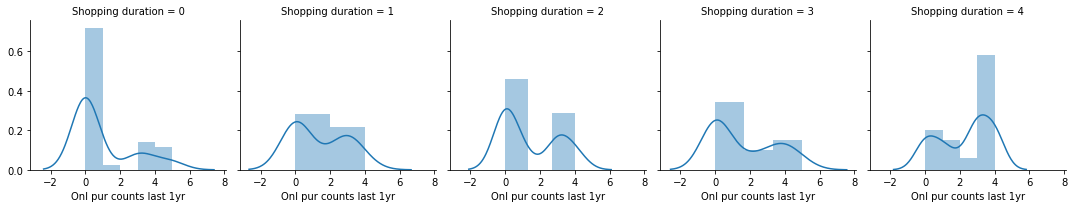

In [1225]:
facet=sns.FacetGrid(cr2_labelll,col='Shopping duration')
facet.map(sns.distplot,'Onl pur counts last 1yr')
plt.show()

Observations-

1. From first distplot we observe that the highest no of customers(approx 70%) are those whose shopping duration is less than 1 year and did online purchasing less than 10 times in last 1 year(i.e New customers). then there are some exceptional cases where the customer purchase duration is less than 1 yr but did online purchase for more 31-40 and more than 41 times, the proportions of these customers are approx 15% and 10% respectively.

2. From second plot we observe that the last yr purchase count of customers with shopping duration 1-2 yr ranges between 0 to 40 times without much variation in proportion(Nearby uniform).

3. From third plot we observe that for the customers with shopping duration 2-3 yr, most of the customers are those who did online purchase approx 0-15 in last year followed by those who did online purchase approx 25-40 times in last year.

4. From fourth plot we observe that for the customers with shopping duration 3-4 yr, most of the customers are those who did online purchase approx 0-17 in last year followed by those who did online purchase more than 41 times in last year and finally those who did online purchase approx 21-41 times in last year.

5. From last plot we observe that for the customers with purchase duration more than 4 yr, most of the customers(approx 55%) are those who did online purchase 31-40 times in last 1 yr.

From above observation we can conclude that for the new customers highest last yr purchase count is 0-10 times.
The customers with online last yr purchase count more than 41 times exist with either shopping duration 1yr or 3-4 yr.
Overall highest no of customers with online last yr purchase count of 31-40 times exist with shopping duration more than 4 yr.

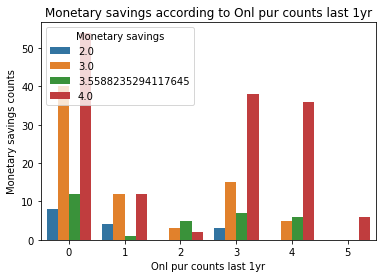

Onl pur counts last 1yr  Monetary savings
0                        4.000000            54
                         3.000000            40
                         3.558824            12
                         2.000000             8
1                        3.000000            12
                         4.000000            12
                         2.000000             4
                         3.558824             1
2                        3.558824             5
                         3.000000             3
                         4.000000             2
3                        4.000000            38
                         3.000000            15
                         3.558824             7
                         2.000000             3
4                        4.000000            36
                         3.558824             6
                         3.000000             5
5                        4.000000             6
Name: Monetary savings, dtype: int64


In [1229]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Onl pur counts last 1yr',hue='Monetary savings',data=cr2_labelll)
plt.title('Monetary savings according to Onl pur counts last 1yr')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Monetary savings counts')
plt.show()

print(cr2_labelll.groupby('Onl pur counts last 1yr')['Monetary savings'].value_counts())

From above plot amongst all customers with different online purchase count in last 1 yr there is a strong perception that the online retail shopping contributes towards Monetary savings.

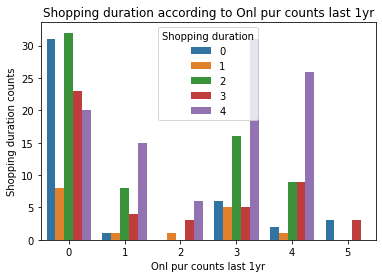

Onl pur counts last 1yr  Shopping duration
0                        2                    32
                         0                    31
                         3                    23
                         4                    20
                         1                     8
1                        4                    15
                         2                     8
                         3                     4
                         0                     1
                         1                     1
2                        4                     6
                         3                     3
                         1                     1
3                        4                    31
                         2                    16
                         0                     6
                         1                     5
                         3                     5
4                        4                    26
                         2

In [1230]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Onl pur counts last 1yr',hue='Shopping duration',data=cr2_labelll)
plt.title('Shopping duration according to Onl pur counts last 1yr')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Shopping duration counts')
plt.show()

print(cr2_labelll.groupby('Onl pur counts last 1yr')['Shopping duration'].value_counts())

From above plot we observe that most of the customers with Onl pur counts last 1yr- less than 10 times falls in shopping duration 2-3 yr followed by those with shopping duration less than 1 yr. Least of the customers with Onl pur counts last 1yr- less than 10 times falls in shopping duration 1-2 yr

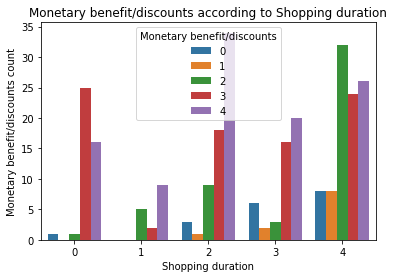

Shopping duration  Monetary benefit/discounts
0                  3                             25
                   4                             16
                   0                              1
                   2                              1
1                  4                              9
                   2                              5
                   3                              2
2                  4                             34
                   3                             18
                   2                              9
                   0                              3
                   1                              1
3                  4                             20
                   3                             16
                   0                              6
                   2                              3
                   1                              2
4                  2                             32
                  

In [1232]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Shopping duration',hue='Monetary benefit/discounts',data=cr2_labelll)
plt.title('Monetary benefit/discounts according to Shopping duration')
plt.xlabel('Shopping duration')
plt.ylabel('Monetary benefit/discounts count')
plt.show()

print(cr2_labelll.groupby('Shopping duration')['Monetary benefit/discounts'].value_counts())

From above plot we observe that for customers with all shopping duration there is very strong perception that Online shopping gives monetary benefit and discounts except the customers with shopping duration more than 4 yr where these are more indifferent to this approach and there could be some other important factors which are more responsible for their loyalty.

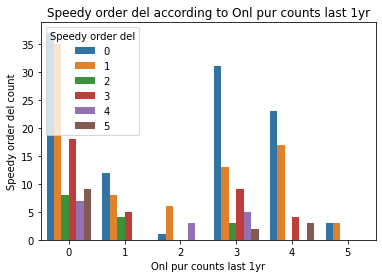

Onl pur counts last 1yr  Speedy order del
0                        0                   37
                         1                   35
                         3                   18
                         5                    9
                         2                    8
                         4                    7
1                        0                   12
                         1                    8
                         3                    5
                         2                    4
2                        1                    6
                         4                    3
                         0                    1
3                        0                   31
                         1                   13
                         3                    9
                         4                    5
                         2                    3
                         5                    2
4                        0                   2

In [1233]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Onl pur counts last 1yr',hue='Speedy order del',data=cr2_labelll)
plt.title('Speedy order del according to Onl pur counts last 1yr')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Speedy order del count')
plt.show()

print(cr2_labelll.groupby('Onl pur counts last 1yr')['Speedy order del'].value_counts())

From above plot we observe that among customers with most of the last year online purchase counts there is perception that Amazon.in has fastest order delivery and Flipkart.com has slow order delivery.

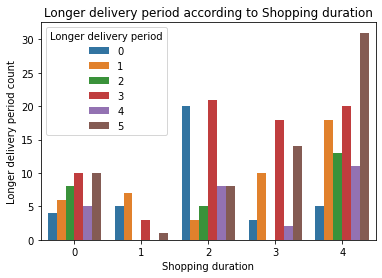

Shopping duration  Longer delivery period
0                  3                         10
                   5                         10
                   2                          8
                   1                          6
                   4                          5
                   0                          4
1                  1                          7
                   0                          5
                   3                          3
                   5                          1
2                  3                         21
                   0                         20
                   4                          8
                   5                          8
                   2                          5
                   1                          3
3                  3                         18
                   5                         14
                   1                         10
                   0                          

In [1246]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Shopping duration',hue='Longer delivery period',data=cr2_labelll)
plt.title('Longer delivery period according to Shopping duration')
plt.xlabel('Shopping duration')
plt.ylabel('Longer delivery period count')
plt.show()

print(cr2_labelll.groupby('Shopping duration')['Longer delivery period'].value_counts())

From above plot we observe that among customers with most of the Shoping duration there is perception that Paytm.com and Snapdeal.com has Longer delivery period.

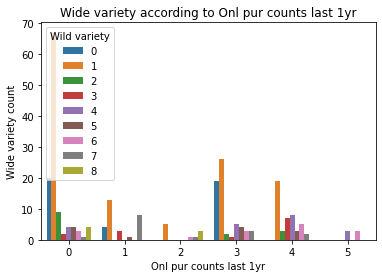

Onl pur counts last 1yr  Wild variety
0                        1               67
                         0               20
                         2                9
                         4                4
                         5                4
                         8                4
                         6                3
                         3                2
                         7                1
1                        1               13
                         7                8
                         0                4
                         3                3
                         5                1
2                        1                5
                         8                3
                         6                1
                         7                1
3                        1               26
                         0               19
                         4                5
                         5            

In [1291]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Onl pur counts last 1yr',hue='Wild variety',data=cr2_labelll)
plt.title('Wide variety according to Onl pur counts last 1yr')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Wide variety count')
plt.show()

print(cr2_labelll.groupby('Onl pur counts last 1yr')['Wild variety'].value_counts())

From above plot we observe that among customers with most of Onl pur counts last 1yr there is perception that Amazon.in and Flipkart.com has best wild variety of products except for the customers with Onl pur counts last 1yr more than 41 times, there is strong perception that Myntra.com with Flipkart.com has best wild variety of products.  

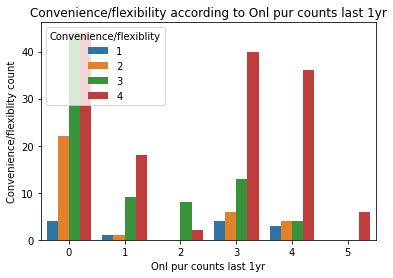

Onl pur counts last 1yr  Convenience/flexiblity
0                        3                         44
                         4                         44
                         2                         22
                         1                          4
1                        4                         18
                         3                          9
                         1                          1
                         2                          1
2                        3                          8
                         4                          2
3                        4                         40
                         3                         13
                         2                          6
                         1                          4
4                        4                         36
                         2                          4
                         3                          4
                         1        

In [1263]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Onl pur counts last 1yr',hue='Convenience/flexiblity',data=cr2_labelll)
plt.title('Convenience/flexibility according to Onl pur counts last 1yr')
plt.xlabel('Onl pur counts last 1yr')
plt.ylabel('Convenience/flexiblity count')
plt.show()

print(cr2_labelll.groupby('Onl pur counts last 1yr')['Convenience/flexiblity'].value_counts())

From above plot we observe that among customers with all Onl pur counts last 1yr, there is strong perception that Shopping online is convenient and flexible

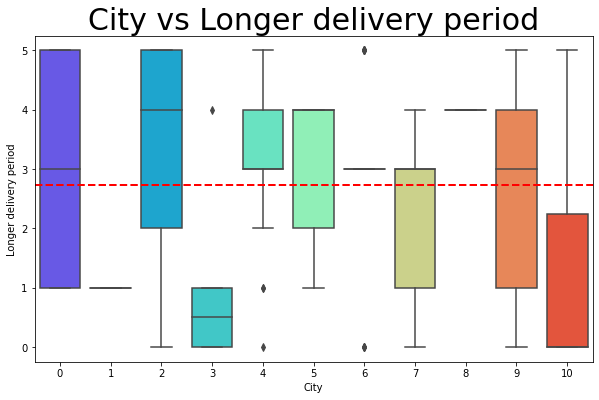

In [1274]:
plt.figure(figsize=(10,6))
mean_deliver_period=np.mean(cr2_labelll['Longer delivery period'])
sns.boxplot(y='Longer delivery period',x='City',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_deliver_period,color='r',linestyle='dashed',linewidth=2)
plt.title('City vs Longer delivery period',fontsize=30)
plt.xticks(rotation='0')
plt.show()

From above plot we observe following -

1. For Banglore city all the online retail shop have delivery period mean greater than overall Longer delivery period mean except Amazon.in.
2. For Delhi city all the online retail shop have delivery period mean greater than overall Longer delivery period mean except Amazon.in and Flipkart.com
3. For Solan city Amazon.in and Flipkart.com longer delivery period mean is way lesser than overall Longer delivery period mean.
4. For Greater Noida city Paytm.com and Snapdeal.com longer delivery period mean is higher than overall Longer delivery period mean.
5. For Gurgaon city Paytm.com, Snapdeal.com and Myntra.com longer delivery period mean is higher than overall Longer delivery period mean.
6. For Bulandshahr city Flipkart.com longer delivery period mean is way lesser than overall Longer delivery period mean.
7. For Karnal city Paytm.com longer delivery period mean is higher than overall Longer delivery period mean.
8. For Merrut city Flipkart.com, Myntra.com and Paytm.com longer delivery period mean is lesser than overall Longer delivery period mean.
9. For Moradabad city Paytm.com and Snapdeal.com longer delivery period mean is way higher than overall Longer delivery period mean.
10.For Noida city Flipkart.com, Myntra.com, Paytm.com and Snapdeal.com longer delivery period mean is higher than overall Longer delivery period mean.
11.For Ghaziabad city Flipkart.com, Myntra.com and Amazon.in longer delivery period mean is lesser than overall Longer delivery period mean.

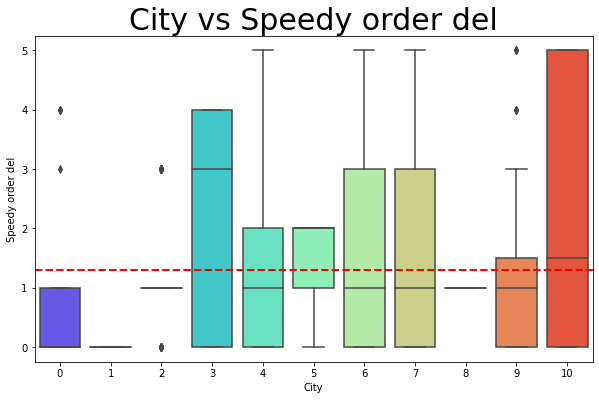

In [1277]:
plt.figure(figsize=(10,6))
mean_deliver=np.mean(cr2_labelll['Speedy order del'])
sns.boxplot(y='Speedy order del',x='City',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_deliver,color='r',linestyle='dashed',linewidth=2)
plt.title('City vs Speedy order del',fontsize=30)
plt.xticks(rotation='0')
plt.show()

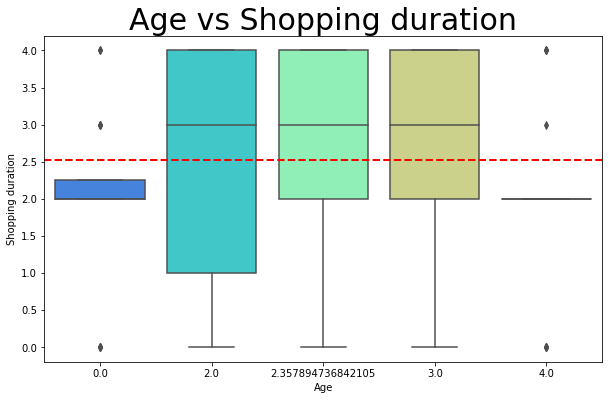

In [1278]:
plt.figure(figsize=(10,6))
mean_shopping_duration=np.mean(cr2_labelll['Shopping duration'])
sns.boxplot(y='Shopping duration',x='Age',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_shopping_duration,color='r',linestyle='dashed',linewidth=2)
plt.title('Age vs Shopping duration',fontsize=30)
plt.xticks(rotation='0')
plt.show()

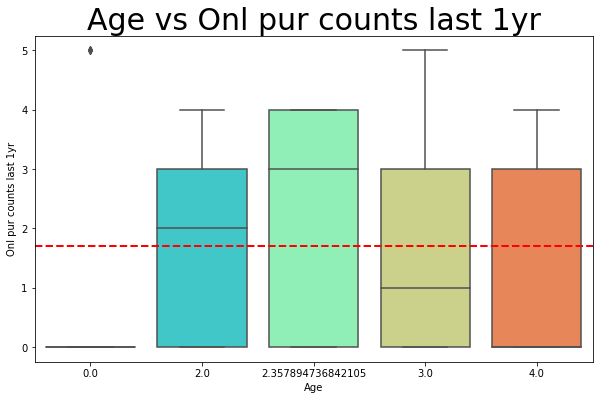

In [1281]:
plt.figure(figsize=(10,6))
mean_purchase_counts=np.mean(cr2_labelll['Onl pur counts last 1yr'])
sns.boxplot(y='Onl pur counts last 1yr',x='Age',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_purchase_counts,color='r',linestyle='dashed',linewidth=2)
plt.title('Age vs Onl pur counts last 1yr',fontsize=30)
plt.xticks(rotation='0')
plt.show()

From above plot we observe following -

1. Customers with Age Less than 20 years have last 1 year purchase count mean=0, i.e - Onl pur counts last 1yr Less than 10 times(Which is less than overall mean)

2. Customers with Age 21-30 years have last 1 year purchase count mean greater than overall mean for the purchage counts ranging 0 to 40 times.

3. Customers with Age 41-50 years have last 1 year purchase count mean lesser than overall mean for the purchage counts ranging 0 to 40 times.

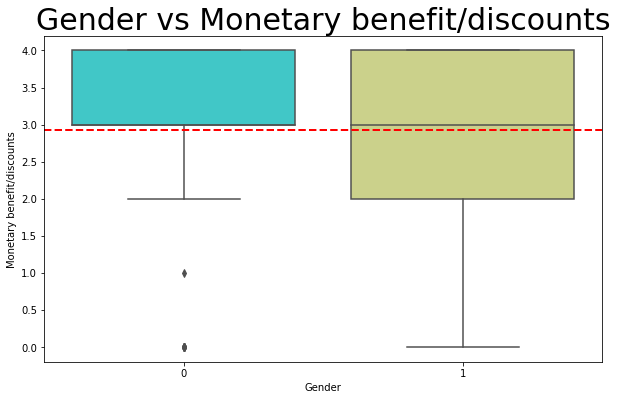

In [1282]:
plt.figure(figsize=(10,6))
mean_discounts=np.mean(cr2_labelll['Monetary benefit/discounts'])
sns.boxplot(y='Monetary benefit/discounts',x='Gender',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_discounts,color='r',linestyle='dashed',linewidth=2)
plt.title('Gender vs Monetary benefit/discounts',fontsize=30)
plt.xticks(rotation='0')
plt.show()

From above plot we observe that Females having perception Online shopping gives monetary benefit and discounts has higher mean as compared with oveall mean of customers who think Online shopping gives monetary benefit and discounts. Also, all the females Agree/Strongly agree for the same but in Males some customers are indifferent towards this approach.

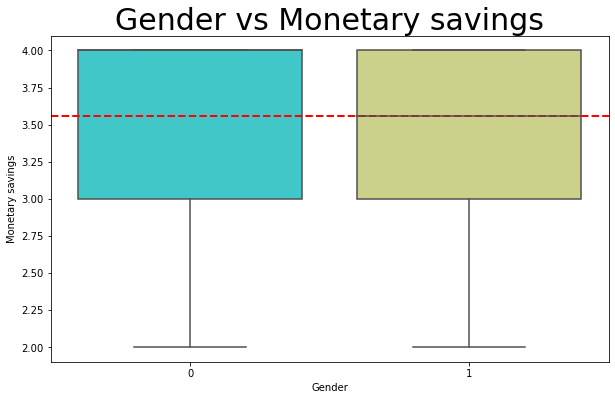

In [1283]:
plt.figure(figsize=(10,6))
mean_savings=np.mean(cr2_labelll['Monetary savings'])
sns.boxplot(y='Monetary savings',x='Gender',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_savings,color='r',linestyle='dashed',linewidth=2)
plt.title('Gender vs Monetary savings',fontsize=30)
plt.xticks(rotation='0')
plt.show()

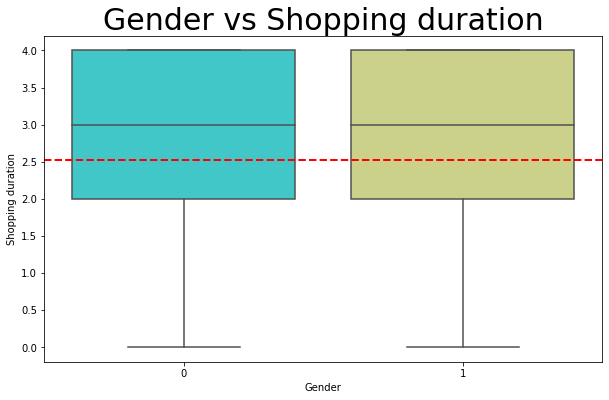

In [1287]:
plt.figure(figsize=(10,6))
mean_duration=np.mean(cr2_labelll['Shopping duration'])
sns.boxplot(y='Shopping duration',x='Gender',data=cr2_labelll,palette='rainbow')
plt.axhline(mean_duration,color='r',linestyle='dashed',linewidth=2)
plt.title('Gender vs Shopping duration',fontsize=30)
plt.xticks(rotation='0')
plt.show()

# Model Train-Test and Performance Evaluation

In [1204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

I am going to use RandomForest classifier model because I think it would be one of the best option to use in Multi-class classification problem where the more emphasis is to be given on Recall metric of performance evaluation. As in this project I am giving more weightage to the customers with graetest Onl pur counts last 1yr label(In this project label 4 and 5) and Recall give more emphasis on False negatives. In this project of customer retention no online retail shop would accept that customers with greater Onl pur counts last 1yr miss the discount or loyalty offer due to wrongly categorizing then into new customers(False negatives), the reverse could be accepted sometimes when a new customer is considered old and to be given special offer.

In [1205]:
x=cr2_labelll.drop(columns=['Onl pur counts last 1yr'])

In [1206]:
y=cr2_labelll['Onl pur counts last 1yr']

In [1207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20,stratify=y)

In [1208]:
m=RandomForestClassifier()
m.fit(x_train,y_train)
print('Score of',m,'is:',m.score(x_train,y_train))
y_pred=m.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classification report:',classification_report(y_test,y_pred))

Score of RandomForestClassifier() is: 0.986046511627907
accuracy score: 0.9444444444444444
confusion matrix: [[23  0  0  0  0  0]
 [ 0  5  0  0  1  0]
 [ 0  0  1  0  1  0]
 [ 1  0  0 12  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0  1]]
classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.83      0.91         6
           2       1.00      0.50      0.67         2
           3       1.00      0.92      0.96        13
           4       0.82      1.00      0.90         9
           5       1.00      1.00      1.00         1

    accuracy                           0.94        54
   macro avg       0.96      0.88      0.90        54
weighted avg       0.95      0.94      0.94        54



As above results we got overall good accuracy score, but we cannot put much emphasis on accuracy score only because there might be overfitting or other error, so I checked all metric parameters of classification report and fould that except for 2 label all the labels have above the mark measures, also the recall is good for the most weighted labels. For label 4 good recall comes with some decrese in precision value but we understand that in most of the cases good value of recall comes at some cost of precision value.  

Feature importance using RandomForestClassifier

Feature importance
Shopping duration                       0.146339
City                                    0.141988
Age                                     0.118622
Intrnet accs mode                       0.091079
Gender                                  0.056262
Compl,rel desc info-products            0.046425
Wild variety                            0.044301
Online retailer recommend               0.042631
Fullfill roles                          0.039307
Social status                           0.036567
Adventure                               0.035665
Longer delivery period                  0.034441
Convenience/flexiblity                  0.029795
Monetary savings                        0.029400
Gratification                           0.028623
Monetary benefit/discounts              0.028311
Speedy order del                        0.025999
 Return/replacement policy              0.024246

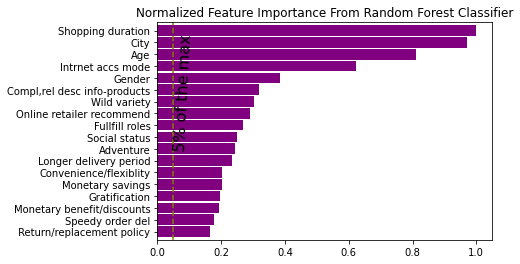

In [1210]:
feature_labels = np.array((x.columns))
(pd.Series(m.feature_importances_,index=feature_labels).sort_values(ascending=True)/np.max(m.feature_importances_)).plot.barh(color='purple',width=0.9)
_ = plt.title('Normalized Feature Importance From Random Forest Classifier')
_ = plt.axvline(0.05,linestyle='--',color='olive')
_ = plt.text(0.05,7,'5% of the max',rotation=87,fontsize=16)
pd.DataFrame(m.feature_importances_,index=feature_labels,columns=['Feature importance']).sort_values('Feature importance',ascending=False)

In [1212]:
from sklearn.metrics import precision_score

In [1213]:
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %.3f' % precision)

Precision: 0.952


In [1214]:
from sklearn.metrics import recall_score

In [1215]:
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %.3f' % recall)

Recall: 0.944


In [1216]:
from sklearn.metrics import f1_score

In [1217]:
score = f1_score(y_test, y_pred, average='weighted')
print('F-Measure: %.3f' % score)

F-Measure: 0.942


Hyperparameter tuning using RandomizedSearchCV to find optimal combination of hyperparameters that minimizes loss function/error

In [1218]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {"max_depth": [3,4,6,8,12,None], 'min_samples_leaf': [1,2,4,6],"n_estimators":[10,50,100,200],"class_weight":['balanced',None]}
grid=RandomizedSearchCV(m,parameters, cv=5, n_jobs=2)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.8629629629629629
{'n_estimators': 50, 'min_samples_leaf': 1, 'max_depth': None, 'class_weight': 'balanced'}


In [1219]:
m2=RandomForestClassifier(n_estimators=50,min_samples_leaf=1,class_weight='balanced')
m2.fit(x_train,y_train)
print('Score of',m2,'is:',m2.score(x_train,y_train))
y_pred2=m2.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred2))
print('confusion matrix:',confusion_matrix(y_test,y_pred2))
print('classification report:',classification_report(y_test,y_pred2))

Score of RandomForestClassifier(class_weight='balanced', n_estimators=50) is: 0.986046511627907
accuracy score: 0.9259259259259259
confusion matrix: [[22  0  0  0  1  0]
 [ 0  5  0  0  1  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0 12  1  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0  1]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       1.00      0.83      0.91         6
           2       1.00      0.50      0.67         2
           3       1.00      0.92      0.96        13
           4       0.69      1.00      0.82         9
           5       1.00      1.00      1.00         1

    accuracy                           0.93        54
   macro avg       0.95      0.87      0.89        54
weighted avg       0.95      0.93      0.93        54



Cross validation to check validity of the result (If there is overfitting or not)

In [1221]:
from sklearn.model_selection import cross_validate

In [1222]:
m2=RandomForestClassifier(n_estimators=50,min_samples_leaf=1,class_weight='balanced')
mscores=cross_validate(m2,x,y,cv=15,scoring=('recall_weighted','precision_weighted','f1_weighted'))
print(mscores)

{'fit_time': array([0.24258065, 0.14719343, 0.13806581, 0.13176823, 0.27032399,
       0.14014173, 0.12764549, 0.20041585, 0.11590791, 0.13121724,
       0.16278744, 0.21325207, 0.15144134, 0.15946722, 0.17158389]), 'score_time': array([0.0226872 , 0.015625  , 0.01565289, 0.01404214, 0.03124356,
       0.01508093, 0.        , 0.01560688, 0.01560307, 0.02213788,
       0.        , 0.0120666 , 0.03036666, 0.01212525, 0.01009846]), 'test_recall_weighted': array([0.83333333, 0.22222222, 0.44444444, 0.77777778, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_precision_weighted': array([0.87191358, 0.22222222, 0.62626263, 0.71296296, 0.90694444,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_f1_weighted': array([0.80853175, 0.22222222, 0.42052469, 0.73068783, 0.87530864,
       1.        , 1.  

Saving RandomForest model for further analysis on test data (For future reference)

In [1292]:
import joblib
file='CustRetRF.pkl'
joblib.dump(m2,file)

['CustRetRF.pkl']

Conclusions and Findings